## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample,
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [3]:
# train = np.loadtxt('/content/drive/MyDrive/MASTER DATA SCIENCE/M1/machine learning 2/TP2/synth_train.txt')

# test = np.loadtxt('/content/drive/MyDrive/MASTER DATA SCIENCE/M1/machine learning 2/TP2/synth_test.txt')

train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class,
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set.
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set.
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


## 1. Implementation of LDA

### 1.1 Formatting data

In [4]:
# Formatting the training dataset

y_train = train[:,0]
X_train = train[:,1:]
X_C_train = train[:,1:].T
N_train = X_train.shape[0]

indiceC1_train = np.nonzero(train[:,0]==1)
indiceC2_train = np.nonzero(train[:,0]==2)


X_C1_train=X_train[indiceC1_train].T
X_C2_train=X_train[indiceC2_train].T

N1_train = X_C1_train.shape[1]
N2_train = X_C2_train.shape[1]


# Formatting the test dataset
y_test = test[:,0]
X_test = test[:,1:]
X_C_test = test[:,1:].T


### 1.2 Estimating the parameters

In [5]:
# Estimation of weights pi_1 and pi_2 for each class
pi_1 = N1_train/N_train
pi_2 = N2_train/N_train

# Estimation of empirical means mu_1 and mu_2 for each class
mu_1 = (X_C1_train.sum(1))/N1_train # Same as "mu_1 = X1_train.mean(1)"
mu_2 = (X_C2_train.sum(1))/N2_train # Same as "mu_2 = X2_train.mean(1)"

mu_1=mu_1.reshape(2,1)
mu_2=mu_2.reshape(2,1)


# Estimation of empirical covariance matrices sigma_1 and sigma_2
sigma_1 = ((X_C1_train - mu_1).dot((X_C1_train - mu_1).T))/N1_train # The same as "sigma_1 = np.cov(X1_train.T, ddof=0)"
# sigma_1 = (np.matmul((X_C1_train-mu_1),(X_C1_train-mu_1).T))/N1_train
sigma_2 = ((X_C2_train - mu_2).dot((X_C2_train - mu_2).T))/N2_train # The same as "sigma_2 = np.cov(X2_train.T, ddof=0)"

# sigma_2 = (np.matmul((X_C2_train-mu_2),(X_C2_train-mu_2).T))/N2_train

# Computation of the common averaged covariance sigma (average of intra-class covariances)
sigma = (N1_train*sigma_1 + N2_train*sigma_2)/N_train

In [6]:
# Computation of log-probabilities of belonging to each class
# We keep only dependance on the classes 1 and 2
log_proba_1 = mu_1.T.dot(inv(sigma)).dot(X_C1_train) - (1/2)*mu_1.T.dot(inv(sigma)).dot(mu_1) + log(pi_1)
log_proba_2 = mu_2.T.dot(inv(sigma)).dot(X_C2_train) - (1/2)*mu_2.T.dot(inv(sigma)).dot(mu_2) + log(pi_2)


# Decision of classification
# Linear parameters for the decision function 1
w1 = inv(sigma).dot(mu_1)
w01 = - (1/2)*mu_1.T.dot(inv(sigma)).dot(mu_1) + log(pi_1)

# Linear parameters for the decision function 2
w2 = inv(sigma).dot(mu_2)
w02 = - (1/2)*mu_2.T.dot(inv(sigma)).dot(mu_2) + log(pi_2)

# We compute the hyperplanes for seperation of regions between classes
f_X_1 = w1.T.dot(X_C_train) + w01
f_X_2 = w2.T.dot(X_C_train) + w02

# Reshaping the target vector of the training dataset
y_train = y_train.reshape(100,1)

# Decision of classification
decision_vector = np.where(f_X_1.T > f_X_2.T, 1, 2)

In [7]:
# Error of the prediction on the train dataset
error_LDA = 1-mean(y_train == decision_vector)
print("The error of the LDA implemented on the training dataset is "+str(error_LDA))

The error of the LDA implemented on the training dataset is 0.030000000000000027


In [8]:
# Reshaping the target vector of the test dataset
y_test = y_test.reshape(200,1)

# We compute the hyperplanes for seperation of regions between classes
f_X_1_test = w1.T.dot(X_C_test) + w01
f_X_2_test = w2.T.dot(X_C_test) + w02

# Decision of classification
dec_vec_test = np.where(f_X_1_test.T > f_X_2_test.T, 1, 2)

# Error of the prediction on the test dataset
error_LDA_test = 1-mean(y_test == dec_vec_test)
print("The error of the LDA implemented on the test dataset is "+str(error_LDA_test))


The error of the LDA implemented on the test dataset is 0.05500000000000005


## 2. Implementation of QDA

In [9]:
# log proba of class one
log_proba_train_c1_vector=np.zeros(shape=(1, X_C_train.shape[1]))

# log proba of class two
log_proba_train_c2_vector=np.zeros(shape=(1, X_C_train.shape[1]))


for column in range(0,X_C_train.shape[1]):

  X=(X_C_train[:,column]).reshape(2,1)

  # class one log proba
  log_proba_train_c1=(X-mu_1).T
  log_proba_train_c1=np.dot(log_proba_train_c1,inv(sigma_1))
  log_proba_train_c1=np.dot(log_proba_train_c1,(X-mu_1))
  log_proba_train_c1=(-(1/2)*log_proba_train_c1)+log(pi_1)-((1/2)*log(det(sigma_1)))# add constant terms

  log_proba_train_c1_vector[0,column]=log_proba_train_c1

  # class two log proba
  log_proba_train_c2=(X-mu_2).T
  log_proba_train_c2=np.dot(log_proba_train_c2,inv(sigma_2))
  log_proba_train_c2=np.dot(log_proba_train_c2,(X-mu_2))
  log_proba_train_c2=(-(1/2)*log_proba_train_c2)+log(pi_2)-((1/2)*log(det(sigma_2)))# add constant terms

  log_proba_train_c2_vector[0,column]=log_proba_train_c2

# Decision of classification
decision_vec_qda_train = np.where(log_proba_train_c1_vector > log_proba_train_c2_vector, 1, 2)

In [10]:
# Error of the prediction on the train dataset
error_QDA = 1-np.mean(decision_vec_qda_train == y_train)
print("The error of the QDA implemented on the training dataset is "+str(error_QDA))

The error of the QDA implemented on the training dataset is 0.3376


In [11]:
# log proba of class one
log_proba_test_c1_vector=np.zeros(shape=(1, X_C_test.shape[1]))

# log proba of class two
log_proba_test_c2_vector=np.zeros(shape=(1, X_C_test.shape[1]))


for column in range(0,X_C_test.shape[1]):

  X=(X_C_test[:,column]).reshape(2,1)

  # class one log proba
  log_proba_test_c1=(X-mu_1).T
  log_proba_test_c1=np.dot(log_proba_test_c1,inv(sigma_1))
  log_proba_test_c1=np.dot(log_proba_test_c1,(X-mu_1))
  log_proba_test_c1=(-(1/2)*log_proba_test_c1)+log(pi_1)-((1/2)*log(det(sigma_1)))# add constant terms

  log_proba_test_c1_vector[0,column]=log_proba_test_c1

  # class two log proba
  log_proba_test_c2=(X-mu_2).T
  log_proba_test_c2=np.dot(log_proba_test_c2,inv(sigma_2))
  log_proba_test_c2=np.dot(log_proba_test_c2,(X-mu_2))
  log_proba_test_c2=(-(1/2)*log_proba_test_c2)+log(pi_2)-((1/2)*log(det(sigma_2)))# add constant terms

  log_proba_test_c2_vector[0,column]=log_proba_test_c2

# Decision of classification
dec_vec_qda_test = np.where(log_proba_test_c1_vector > log_proba_test_c2_vector, 1, 2)

In [12]:
# Error of the prediction on the test dataset
error_QDA_test = 1-mean(y_test == dec_vec_qda_test)
print("The error of the QDA implemented on the test dataset is "+str(error_QDA_test))

The error of the QDA implemented on the test dataset is 0.41259999999999997


## 3. Decision boundaries for LDA and QDA

### 3.1 Decision boundaries for LDA

Text(0.5, 1.0, 'Decision Boundary for LDA')

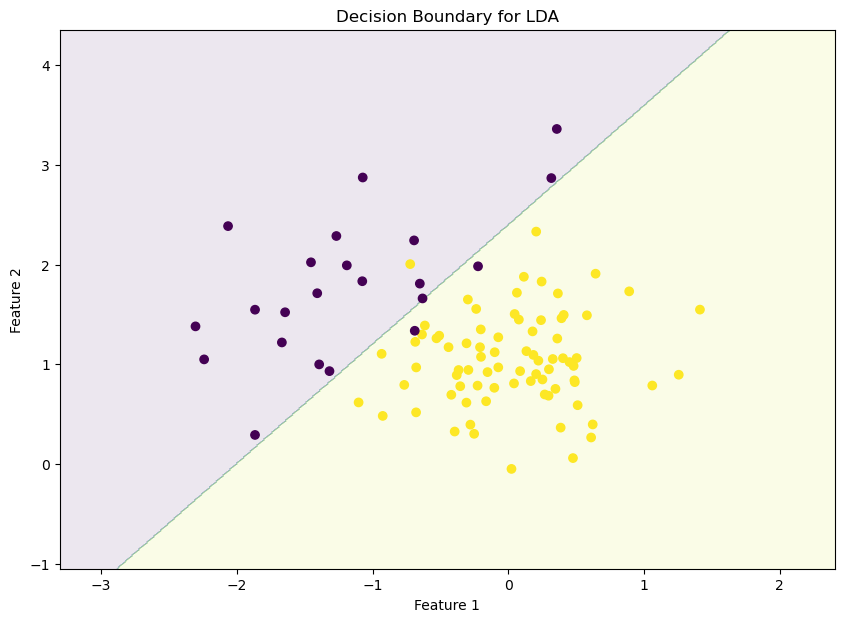

In [13]:
# To Plot the Decision Boundary for LDA
arr1 = np.arange(X_train[:, 0].min()-1, X_train[:, 0].max()+1, 0.01)
arr2 = np.arange(X_train[:, 1].min()-1, X_train[:, 1].max()+1, 0.01)


xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T

# For the prediction
# labels = clf_LDA.predict(input_array)
f_X_1_dec_func = w1.T.dot(input_array.T) + w01
f_X_2_dec_func = w2.T.dot(input_array.T) + w02

labels = np.where(f_X_1_dec_func.T > f_X_2_dec_func.T, 1, 2)

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for LDA')

### 3.2 Decision boundaries for QDA

Text(0.5, 1.0, 'Decision Boundary')

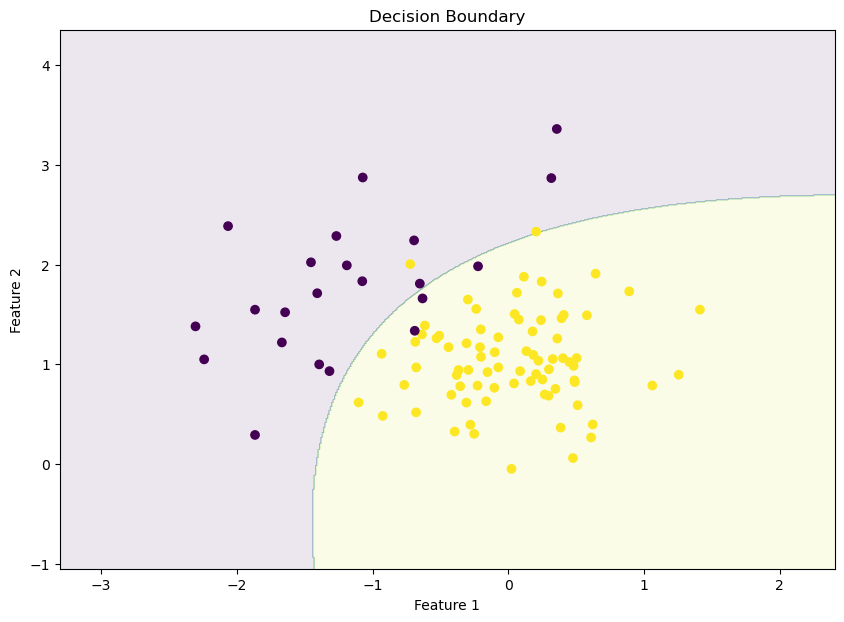

In [14]:
# To Plot the Decision Boundary
arr1 = np.arange(X_train[:, 0].min()-1, X_train[:, 0].max()+1, 0.01)
arr2 = np.arange(X_train[:, 1].min()-1, X_train[:, 1].max()+1, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T

# log proba of class one
log_proba_c1_vector=np.zeros(shape=(1, input_array.T.shape[1]))

# log proba of class two
log_proba_c2_vector=np.zeros(shape=(1, input_array.T.shape[1]))


for column in range(0,input_array.T.shape[1]):

  X=(input_array.T[:,column]).reshape(2,1)

  # class one log proba
  log_proba_c1=(X-mu_1).T
  log_proba_c1=np.dot(log_proba_c1,inv(sigma_1))
  log_proba_c1=np.dot(log_proba_c1,(X-mu_1))
  log_proba_c1=(-(1/2)*log_proba_c1)+log(pi_1)-((1/2)*log(det(sigma_1)))# add constant terms

  log_proba_c1_vector[0,column]=log_proba_c1

  # class two log proba
  log_proba_c2=(X-mu_2).T
  log_proba_c2=np.dot(log_proba_c2,inv(sigma_2))
  log_proba_c2=np.dot(log_proba_c2,(X-mu_2))
  log_proba_c2=(-(1/2)*log_proba_c2)+log(pi_2)-((1/2)*log(det(sigma_2)))# add constant terms

  log_proba_c2_vector[0,column]=log_proba_c2

# Decision of classification
decision_vec_qda = np.where(log_proba_c1_vector > log_proba_c2_vector, 1, 2)


labels = decision_vec_qda.copy()

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

## 4. Comparing LDA and QDA results

# **Conclusion**

In [15]:
'''

We can see from the performance evaluation on the LDA and QDA models that both of them perform almost the same.

In the training set there's a slight difference in performance, where LDA gave ~3% of error, while the QDA model gave ~5%.

However, in the test set both models presented approximatedly 5% of error. Which is the actual error we are interested in, because it's telling us how the model performs in front of data it has
never seen.

From these results we can conclude, that LDA is the best model to classify our data. The distribution of our data allows us to easily build a decision region with a linear hyperplane,

hence, there is no need to work on more complex decision boundaries for this dataset.


'''

"\n\nWe can see from the performance evaluation on the LDA and QDA models that both of them perform almost the same.\n\nIn the training set there's a slight difference in performance, where LDA gave ~3% of error, while the QDA model gave ~5%.\n\nHowever, in the test set both models presented approximatedly 5% of error. Which is the actual error we are interested in, because it's telling us how the model performs in front of data it has\nnever seen.\n\nFrom these results we can conclude, that LDA is the best model to classify our data. The distribution of our data allows us to easily build a decision region with a linear hyperplane,\n\nhence, there is no need to work on more complex decision boundaries for this dataset.\n\n\n"

## 5. Implementation of K-NN classifier on the data set for comparison with LDA and QDA

[1.   0.97 0.97 0.97 0.95 0.97 0.94 0.94 0.94 0.94 0.93 0.93 0.92 0.93
 0.92 0.92 0.92 0.92 0.92 0.92 0.91 0.91 0.9  0.91 0.91 0.91 0.9  0.91
 0.9  0.9  0.9  0.9  0.9  0.9  0.86 0.86 0.83 0.84 0.79 0.79]
[0.935 0.94  0.955 0.95  0.94  0.945 0.93  0.93  0.925 0.925 0.91  0.925
 0.92  0.925 0.925 0.925 0.92  0.92  0.92  0.92  0.9   0.9   0.88  0.885
 0.87  0.87  0.855 0.86  0.845 0.845 0.815 0.815 0.79  0.8   0.77  0.77
 0.76  0.76  0.72  0.725]


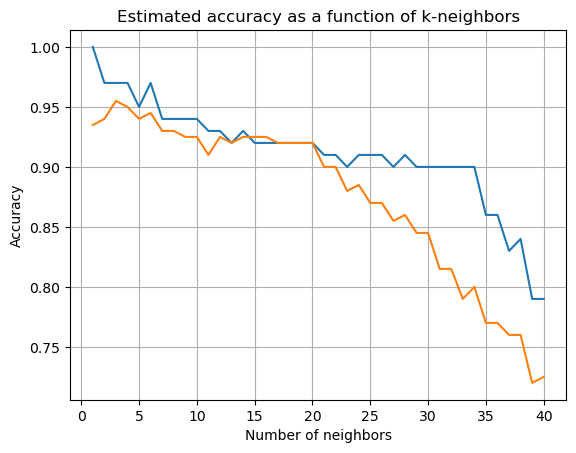

We obtain the maximum test/generalization accuracy when k is equal to 3, with 0.955


In [16]:
# Choice of the parameter k of the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

kmax = 40
pos = arange(1,kmax+1)

train_score = np.zeros(kmax)
test_score = np.zeros(kmax)

for k in range(1,kmax+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, train[:,0])
    train_score[k-1] = knn.score(X_train, y_train)
    test_score[k-1] = knn.score(X_test, y_test)
print(train_score)
print(test_score)


fig, ax = plt.subplots()
ax.plot(pos, train_score, label='Training score')
ax.plot(pos, test_score, label='Test score')

ax.set(xlabel='Number of neighbors', ylabel='Accuracy',
       title='Estimated accuracy as a function of k-neighbors')
ax.grid()

fig.savefig("Accuracy.png")
plt.show()


print(f"We obtain the maximum test/generalization accuracy when k is equal to {argmax(test_score)+1}, with {max(test_score)}")

The training/empirical accuracy of the model is: 0.97
The test/generalization accuracy of the model is: 0.955
The cross-validation score of the model is: 0.93


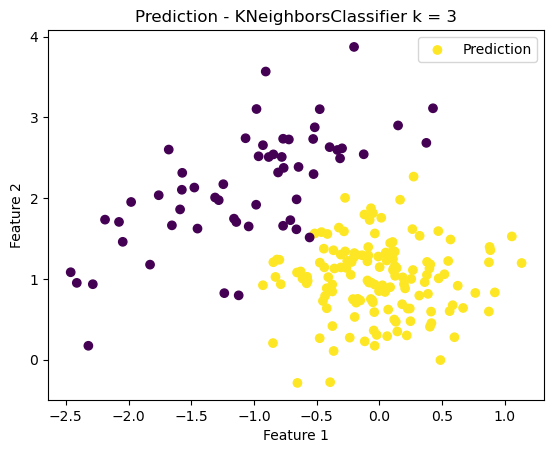

In [17]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, train[:,0])

y_hat_test = knn.predict(X_test)

print('The training/empirical accuracy of the model is:', knn.score(X_train, y_train))
print('The test/generalization accuracy of the model is:', knn.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
cv_score = np.mean(cross_val_score(knn, X_train, train[:,0], cv=10, scoring='accuracy'))
print('The cross-validation score of the model is:', cv_score)


# Some plots
import matplotlib.pyplot as plt

# Plot the KNNClassifier Prediction
plt.scatter(X_test[:,0], X_test[:,1], c=y_hat_test, label='Prediction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Prediction - KNeighborsClassifier k = " + str(k))
plt.show()


# **Conclusion**



In [18]:
'''

From the implementation of knn in this dataset, we can see that compared to LDA and QDA it performs slightly better
in the test dataset ~4% of error.

This aligns with the fact that discriminant function-based models perform often very efficiently.

However, due to the low complexity on our dataset distribution, both knn and LDA are good candidates for classifiers.


'''

'\n\nFrom the implementation of knn in this dataset, we can see that compared to LDA and QDA it performs slightly better\nin the test dataset ~4% of error.\n\nThis aligns with the fact that discriminant function-based models perform often very efficiently.\n\nHowever, due to the low complexity on our dataset distribution, both knn and LDA are good candidates for classifiers.\n\n\n'

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




## 1. LDA with Scikit-learn

The training/empirical accuracy of the model is: 0.97
The test/generalization accuracy of the model is: 0.945
The cross-validation score of the model is: 0.95


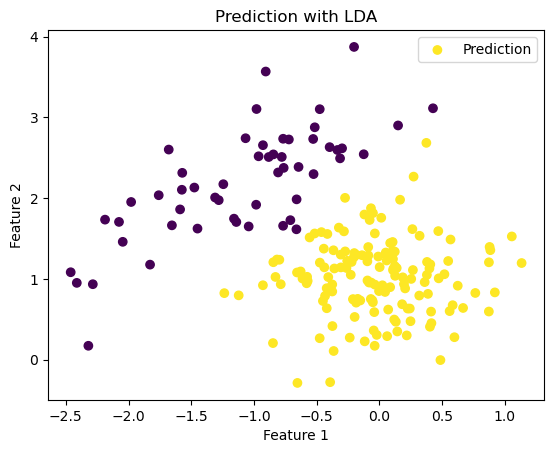

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train, train[:,0])

y_LDA = clf_LDA.predict(X_test)

print('The training/empirical accuracy of the model is:', clf_LDA.score(X_train, y_train))
print('The test/generalization accuracy of the model is:', clf_LDA.score(X_test, y_test))
cv_LDA = np.mean(cross_val_score(clf_LDA, X_train, train[:,0], cv=10, scoring='accuracy'))
print('The cross-validation score of the model is:', cv_LDA)


plt.scatter(X_test[:,0], X_test[:,1], c=y_LDA, label='Prediction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Prediction with LDA")
plt.show()

Text(0.5, 1.0, 'Decision Boundary')

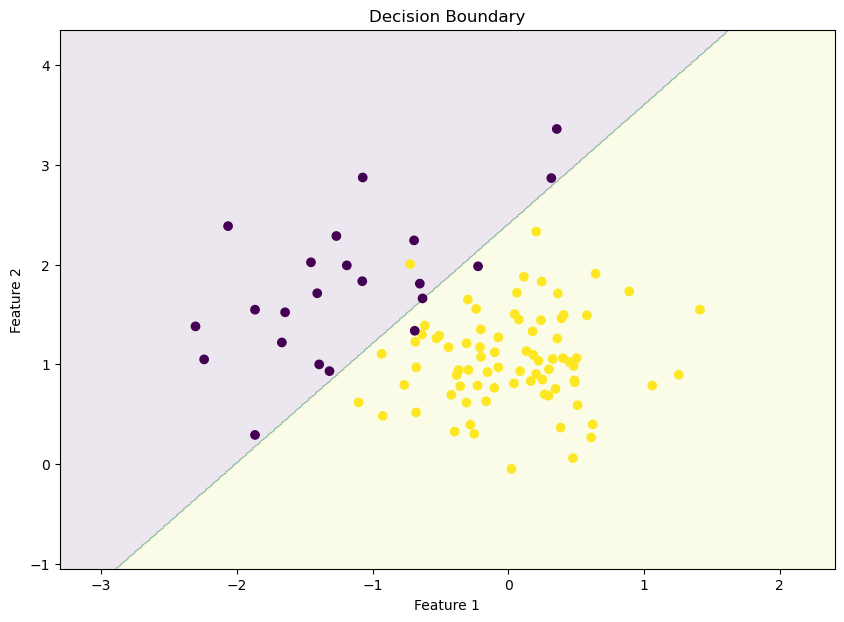

In [20]:
# Decision Function of LDA
Decision_Function = clf_LDA.decision_function(X_train)

# To Plot the Decision Boundary
arr1 = np.arange(X_train[:, 0].min()-1, X_train[:, 0].max()+1, 0.01)
arr2 = np.arange(X_train[:, 1].min()-1, X_train[:, 1].max()+1, 0.01)


xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = clf_LDA.predict(input_array)

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

## 2.  QDA with Scikit-learn

The training/empirical accuracy of the model is: 0.95
The test/generalization accuracy of the model is: 0.95
The cross-validation score of the model is: 0.9400000000000001


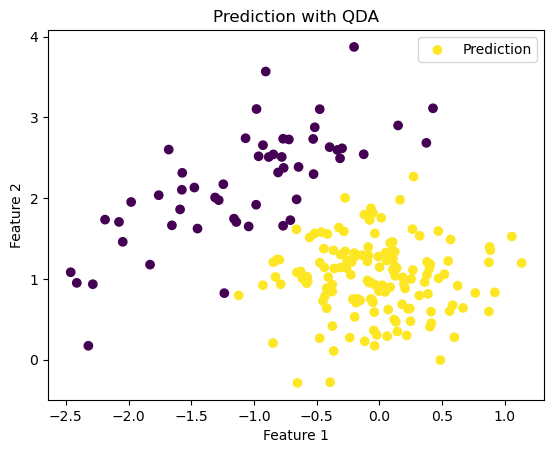

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, train[:,0])

y_QDA = clf_QDA.predict(X_test)

print('The training/empirical accuracy of the model is:', clf_QDA.score(X_train, y_train))
print('The test/generalization accuracy of the model is:', clf_QDA.score(X_test, y_test))
cv_QDA = np.mean(cross_val_score(clf_QDA, X_train, train[:,0], cv=10, scoring='accuracy'))
print('The cross-validation score of the model is:', cv_QDA)

plt.scatter(X_test[:,0], X_test[:,1], c=y_QDA, label='Prediction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Prediction with QDA")
plt.show()

Text(0.5, 1.0, 'Decision Boundary')

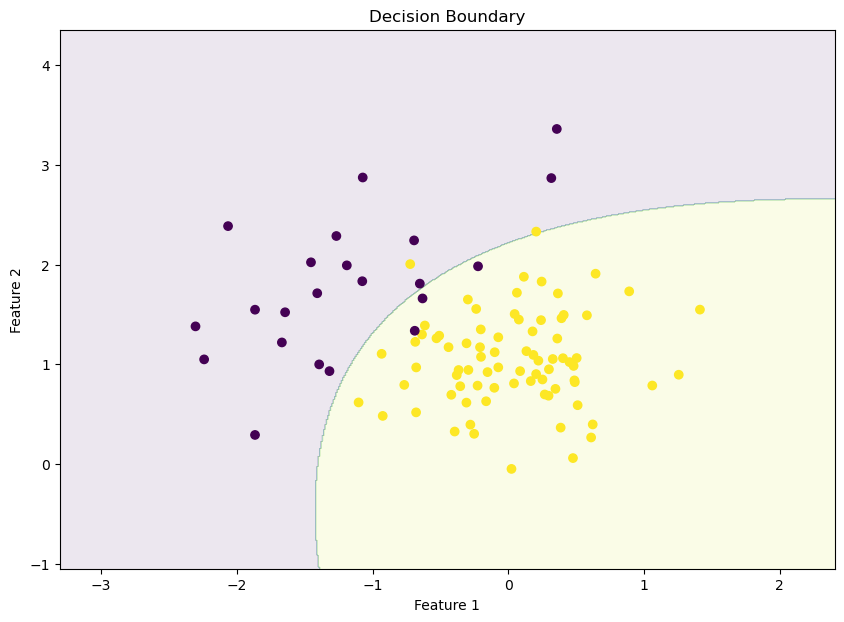

In [22]:
# Decision Function of QDA
Decision_Function = clf_QDA.decision_function(X_train)

# To Plot the Decision Boundary
arr1 = np.arange(X_train[:, 0].min()-1, X_train[:, 0].max()+1, 0.01)
arr2 = np.arange(X_train[:, 1].min()-1, X_train[:, 1].max()+1, 0.01)


xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = clf_QDA.predict(input_array)

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.title('Decision Boundary')